# 试位法

* 试位法是通过连接两个端点的函数值，得到与x轴的交点，多次迭代，逼近零点。

### 步骤

* 1.输入非线性函数`f(x)`和区间`[a,b]`。
* 2.判断f(a) * f(b) > 0，如果是，重新输入区间；否则进行下面操作：
    * 2.1.得到与x轴交点的坐标`b' = b - f(b) * (a - b) / (f(a) - f(b))`
    * 2.2.如果`f(b')==0`，则`b'`就是零点。否则：
    * 2.3.`b = b'`，`least_b' = b'`。
    * 2.3.继续计算`b'`的值，得到新的`b'`值。
        * 判断`(b' - least_b') / b'`是否满足最小精度值，如果是，则输出b'；否则：继续迭代，直到满足。

### 缺点

* 当函数图像比较平滑时，则每次与x的交点几乎不移动，迭代次数多，比二分法效果差。

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time


def fun(x):
    f = math.pow(x, 3) - x - 1
    return f

start = time.time()

flag = True
list = []  # 存储b1
list_acc = []#存储误差

while (flag):
    a = float(input('请输入左端点值:'))
    b = float(input('请输入右端点值:'))
    accuracy = float(input('请输入精度:'))

    k = 0
    if fun(a) * fun(b) > 0:
        print('请重新输入！！！')

    else:
        b1 = b - fun(b) * (a - b) / (fun(a) - fun(b))
        while (flag):
            if fun(b1) == 0:
                print(b1)
                print('迭代次数为：',k)
            if(fun(b1) * fun(a) < 0):
                b = b1
            else:
                a = b1
            least_b1 = b1
            list.append(b1)
            b1 = b - fun(b) * (a - b) / (fun(a) - fun(b))
            list_acc.append((b1 - least_b1) / b1)
            if abs((b1 - least_b1) / b1) < accuracy:
                print('零点坐标为:',b1)
                print('迭代次数为：',k)
                flag = False
            k = k + 1
end = time.time()
# print(list)
print('运行时间为:',end - start)

请输入左端点值:0
请输入右端点值:3
请输入精度:0.0001
零点坐标为: 1.3244908066289387
迭代次数为： 26
运行时间为: 6.830327272415161


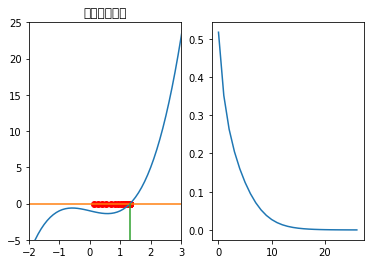

In [19]:
plt.subplot(121)
x = np.arange(-2, 5, 0.1)
y = x * x * x - x - 1
plt.plot(x, y)

plt.scatter(b1, 0, c='r')  # 绘制零点
plt.plot([-2, 3], [0, 0])  # 绘制y = 0直线
plt.plot([b1, b1], [-10, 0])  # 绘制x = b1的直线

plt.axis([-2, 3, -5, 25])
plt.title('试位法函数图')

# 每次与x的交点
for x in list:
    plt.scatter(x, 0, c='r')
    
#误差曲线
plt.subplot(122)
plt.plot(list_acc)
plt.show()